In [1]:
pip install MiniSom

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("pca_output_1million.csv")

In [3]:
df.shape

(1000000, 51)

In [4]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,0,-5.383399,-10.192613,8.277824,2.527131,-8.946253,0.282628,-5.829131,-6.719389,3.969827,...,-1.365698,-0.026407,-0.850059,1.377004,0.631306,1.942457,-1.103816,-0.597181,0.365338,-1.906605
1,1,-5.383399,-10.192613,8.277824,2.527131,-8.946253,0.282628,-5.829131,-6.719389,3.969827,...,-1.365698,-0.026407,-0.850059,1.377004,0.631306,1.942457,-1.103816,-0.597181,0.365338,-1.906605
2,2,-5.383399,-10.192613,8.277824,2.527131,-8.946253,0.282628,-5.829131,-6.719389,3.969827,...,-1.365698,-0.026407,-0.850059,1.377004,0.631306,1.942457,-1.103816,-0.597181,0.365338,-1.906605
3,3,-5.383399,-10.192613,8.277824,2.527131,-8.946253,0.282628,-5.829131,-6.719389,3.969827,...,-1.365698,-0.026407,-0.850059,1.377004,0.631306,1.942457,-1.103816,-0.597181,0.365338,-1.906605
4,4,-5.383399,-10.192613,8.277824,2.527131,-8.946253,0.282628,-5.829131,-6.719389,3.969827,...,-1.365698,-0.026407,-0.850059,1.377004,0.631306,1.942457,-1.103816,-0.597181,0.365338,-1.906605


In [5]:
df = df.drop("Unnamed: 0",axis=1)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-5.383399,-10.192613,8.277824,2.527131,-8.946253,0.282628,-5.829131,-6.719389,3.969827,-3.758924,...,-1.365698,-0.026407,-0.850059,1.377004,0.631306,1.942457,-1.103816,-0.597181,0.365338,-1.906605
1,-5.383399,-10.192613,8.277824,2.527131,-8.946253,0.282628,-5.829131,-6.719389,3.969827,-3.758924,...,-1.365698,-0.026407,-0.850059,1.377004,0.631306,1.942457,-1.103816,-0.597181,0.365338,-1.906605
2,-5.383399,-10.192613,8.277824,2.527131,-8.946253,0.282628,-5.829131,-6.719389,3.969827,-3.758924,...,-1.365698,-0.026407,-0.850059,1.377004,0.631306,1.942457,-1.103816,-0.597181,0.365338,-1.906605
3,-5.383399,-10.192613,8.277824,2.527131,-8.946253,0.282628,-5.829131,-6.719389,3.969827,-3.758924,...,-1.365698,-0.026407,-0.850059,1.377004,0.631306,1.942457,-1.103816,-0.597181,0.365338,-1.906605
4,-5.383399,-10.192613,8.277824,2.527131,-8.946253,0.282628,-5.829131,-6.719389,3.969827,-3.758924,...,-1.365698,-0.026407,-0.850059,1.377004,0.631306,1.942457,-1.103816,-0.597181,0.365338,-1.906605


In [7]:
df = np.array(df)

In [8]:
from minisom import MiniSom

In [9]:
SOM = MiniSom(30,30, 50, sigma=0.5, learning_rate=.5,neighborhood_function='gaussian',random_seed=50)

In [10]:
SOM.train_batch(df, 1000000, verbose=True)


 [ 1000000 / 1000000 ] 100% - 0:00:00 left 

C:\Users\PC 4\anaconda3\lib\site-packages\minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)



 quantization error: 0.32252264940141684


In [11]:
som_shape = (30,30)

In [12]:
# each neuron represents a cluster
winner_coordinates = np.array([SOM.winner(x) for x in df]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

In [13]:
(np.unique(cluster_index))

array([  0,   3,   7,  11,  14,  46,  61,  64,  70,  93,  96,  98, 101,
       104, 122, 150, 152, 155, 158, 162, 183, 187, 188, 189, 195, 211,
       214, 216, 225, 226, 229, 240, 242, 246, 248, 252, 273, 275, 276,
       277, 280, 286, 300, 302, 308, 314, 316, 319, 334, 336, 347, 349,
       368, 373, 374, 376, 390, 393, 395, 396, 397, 401, 425, 426, 427,
       428, 429, 430, 440, 450, 451, 452, 455, 465, 476, 481, 482, 483,
       486, 488, 503, 512, 514, 517, 520, 522, 527, 531, 535, 538, 539,
       546, 560, 561, 562, 563, 564, 565, 567, 568, 569, 572, 574, 575,
       576, 577, 583, 592, 593, 594, 596, 597, 598, 599, 609, 615, 617,
       619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 651, 652,
       653, 654, 655, 656, 657, 658, 659, 673, 679, 681, 683, 685, 686,
       687, 688, 689, 707, 712, 713, 715, 718, 719, 739, 741, 743, 747,
       748, 749, 772, 773, 774, 776, 777, 778, 779, 799, 803, 805, 831,
       834, 836, 859, 861, 863, 865, 889], dtype=int64)

In [14]:
for i in np.unique(cluster_index):
 print("cluster no. - > ",i," = ",len(df[cluster_index==i])," templates")

cluster no. - >  0  =  77653  templates
cluster no. - >  3  =  35737  templates
cluster no. - >  7  =  13235  templates
cluster no. - >  11  =  13235  templates
cluster no. - >  14  =  13235  templates
cluster no. - >  46  =  1557  templates
cluster no. - >  61  =  14784  templates
cluster no. - >  64  =  17916  templates
cluster no. - >  70  =  60  templates
cluster no. - >  93  =  8566  templates
cluster no. - >  96  =  6961  templates
cluster no. - >  98  =  17973  templates
cluster no. - >  101  =  272  templates
cluster no. - >  104  =  162  templates
cluster no. - >  122  =  6646  templates
cluster no. - >  150  =  15366  templates
cluster no. - >  152  =  11327  templates
cluster no. - >  155  =  17973  templates
cluster no. - >  158  =  162  templates
cluster no. - >  162  =  17973  templates
cluster no. - >  183  =  9400  templates
cluster no. - >  187  =  8511  templates
cluster no. - >  188  =  57  templates
cluster no. - >  189  =  7181  templates
cluster no. - >  195  =  7

In [15]:
arr=[]

In [16]:
for i in np.unique(cluster_index):
 if len(df[cluster_index==i]) < 8:
    arr.append(i)

In [17]:
arr

[195, 226, 276, 308, 397, 512]

In [39]:
len(np.unique(cluster_index))

176

In [18]:
data=pd.read_csv("data_error.csv")

In [19]:
data.head()

,Unnamed: 0,index,processid,epoch_time,TemplateId,LogTemplate,content,error
0,0,1,NaN,2022-06-29 03:10:21.812366638,89ff4d3458033b3cb0163eca793d1d65,29-06-2022 03 10 <*> [debug] [pid 803171] [tid...,29-06-2022 03:10:21 [debug] [pid 803171] [tid ...,False
1,1,2,NaN,2022-06-29 03:10:21.812374145,89ff4d3458033b3cb0163eca793d1d65,29-06-2022 03 10 <*> [debug] [pid 803171] [tid...,29-06-2022 03:10:21 [debug] [pid 803171] [tid ...,False
2,2,3,NaN,2022-06-29 03:10:21.812381338,89ff4d3458033b3cb0163eca793d1d65,29-06-2022 03 10 <*> [debug] [pid 803171] [tid...,29-06-2022 03:10:21 [debug] [pid 803171] [tid ...,False
3,3,4,NaN,2022-06-29 03:10:21.812388855,89ff4d3458033b3cb0163eca793d1d65,29-06-2022 03 10 <*> [debug] [pid 803171] [tid...,29-06-2022 03:10:21 [debug] [pid 803171] [tid ...,False
4,4,5,NaN,2022-06-29 03:10:21.812396261,89ff4d3458033b3cb0163eca793d1d65,29-06-2022 03 10 <*> [debug] [pid 803171] [tid...,29-06-2022 03:10:21 [debug] [pid 803171] [tid ...,False


In [20]:
new = pd.read_csv("pca_output_1million.csv")

In [21]:
new["cluster_index"]=pd.Series(np.zeros(len(new)))

In [22]:
new.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,cluster_index
0,0,-5.383399,-10.192613,8.277824,2.527131,-8.946253,0.282628,-5.829131,-6.719389,3.969827,...,-0.026407,-0.850059,1.377004,0.631306,1.942457,-1.103816,-0.597181,0.365338,-1.906605,0.0
1,1,-5.383399,-10.192613,8.277824,2.527131,-8.946253,0.282628,-5.829131,-6.719389,3.969827,...,-0.026407,-0.850059,1.377004,0.631306,1.942457,-1.103816,-0.597181,0.365338,-1.906605,0.0
2,2,-5.383399,-10.192613,8.277824,2.527131,-8.946253,0.282628,-5.829131,-6.719389,3.969827,...,-0.026407,-0.850059,1.377004,0.631306,1.942457,-1.103816,-0.597181,0.365338,-1.906605,0.0
3,3,-5.383399,-10.192613,8.277824,2.527131,-8.946253,0.282628,-5.829131,-6.719389,3.969827,...,-0.026407,-0.850059,1.377004,0.631306,1.942457,-1.103816,-0.597181,0.365338,-1.906605,0.0
4,4,-5.383399,-10.192613,8.277824,2.527131,-8.946253,0.282628,-5.829131,-6.719389,3.969827,...,-0.026407,-0.850059,1.377004,0.631306,1.942457,-1.103816,-0.597181,0.365338,-1.906605,0.0


In [23]:
cluster_index
new["cluster_index"] = pd.Series(cluster_index)

In [24]:
new

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,cluster_index
0,0,-5.383399,-10.192613,8.277824,2.527131,-8.946253,0.282628,-5.829131,-6.719389,3.969827,...,-0.026407,-0.850059,1.377004,0.631306,1.942457,-1.103816,-0.597181,0.365338,-1.906605,455
1,1,-5.383399,-10.192613,8.277824,2.527131,-8.946253,0.282628,-5.829131,-6.719389,3.969827,...,-0.026407,-0.850059,1.377004,0.631306,1.942457,-1.103816,-0.597181,0.365338,-1.906605,455
2,2,-5.383399,-10.192613,8.277824,2.527131,-8.946253,0.282628,-5.829131,-6.719389,3.969827,...,-0.026407,-0.850059,1.377004,0.631306,1.942457,-1.103816,-0.597181,0.365338,-1.906605,455
3,3,-5.383399,-10.192613,8.277824,2.527131,-8.946253,0.282628,-5.829131,-6.719389,3.969827,...,-0.026407,-0.850059,1.377004,0.631306,1.942457,-1.103816,-0.597181,0.365338,-1.906605,455
4,4,-5.383399,-10.192613,8.277824,2.527131,-8.946253,0.282628,-5.829131,-6.719389,3.969827,...,-0.026407,-0.850059,1.377004,0.631306,1.942457,-1.103816,-0.597181,0.365338,-1.906605,455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,12.851767,-5.287770,-5.189293,3.991122,4.019181,-1.741989,-6.008876,-1.633752,7.911513,...,0.410981,-0.605112,0.185913,-0.250849,0.362651,0.199579,0.432472,0.147706,0.217494,162
999996,999996,-2.804305,2.166025,-9.671782,-1.334963,-1.391106,-0.190234,2.375246,-1.646025,-6.340805,...,0.268873,-1.061919,-1.542377,-0.136053,1.342731,-0.519192,2.206354,-0.403644,-1.286370,211
999997,999997,-4.334136,5.387394,-6.943995,-0.467455,2.305007,6.197393,0.859811,-1.159775,1.399474,...,-1.444338,0.589300,-0.104120,0.675212,1.721073,0.933276,0.519853,0.822488,0.374943,64
999998,999998,-3.044736,4.102068,-10.731662,-1.168011,-2.965008,0.594431,-2.224040,-2.246162,-1.923992,...,-3.524683,1.846579,-0.837392,1.135484,-0.739048,0.245940,-0.380596,0.918967,0.502591,214


In [36]:
new.to_csv("cluster_1million.csv")

In [37]:
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

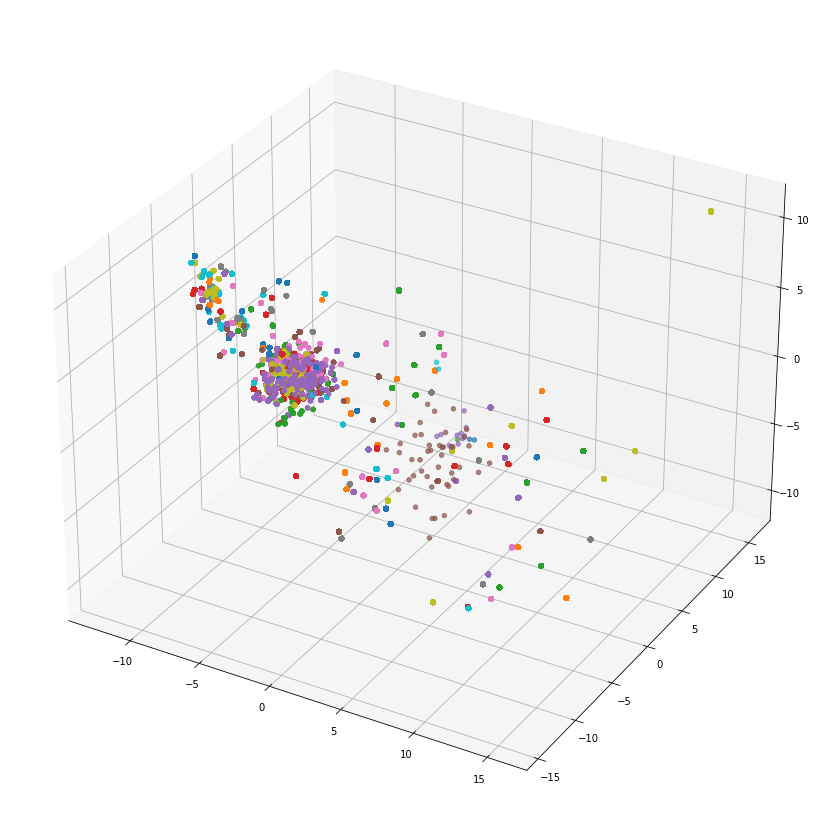

In [38]:
fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(111, projection='3d')
for c in np.unique(cluster_index):
  ax.scatter(df[cluster_index == c, 0],df[cluster_index == c, 1],df[cluster_index == c, 2],label='cluster='+str(c), alpha=.7)

In [25]:


anomaly_30=new[new["cluster_index"].isin(arr)]

anomaly_30

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,cluster_index
300,300,-3.774578,3.790183,-4.153429,-0.261041,4.086332,0.425906,-0.095960,0.341438,2.291348,...,-0.778342,1.586199,-1.146597,-3.338601,-0.192627,-0.512038,0.389915,-1.079342,0.311456,195
307,307,-3.774578,3.790183,-4.153429,-0.261041,4.086332,0.425906,-0.095960,0.341438,2.291348,...,-0.778342,1.586199,-1.146597,-3.338601,-0.192627,-0.512038,0.389915,-1.079342,0.311456,195
322,322,-3.774578,3.790183,-4.153429,-0.261041,4.086332,0.425906,-0.095960,0.341438,2.291348,...,-0.778342,1.586199,-1.146597,-3.338601,-0.192627,-0.512038,0.389915,-1.079342,0.311456,195
329,329,-3.774578,3.790183,-4.153429,-0.261041,4.086332,0.425906,-0.095960,0.341438,2.291348,...,-0.778342,1.586199,-1.146597,-3.338601,-0.192627,-0.512038,0.389915,-1.079342,0.311456,195
342,342,-3.774578,3.790183,-4.153429,-0.261041,4.086332,0.425906,-0.095960,0.341438,2.291348,...,-0.778342,1.586199,-1.146597,-3.338601,-0.192627,-0.512038,0.389915,-1.079342,0.311456,195
349,349,-3.774578,3.790183,-4.153429,-0.261041,4.086332,0.425906,-0.095960,0.341438,2.291348,...,-0.778342,1.586199,-1.146597,-3.338601,-0.192627,-0.512038,0.389915,-1.079342,0.311456,195
4518,4518,-3.774578,3.790183,-4.153429,-0.261041,4.086332,0.425906,-0.095960,0.341438,2.291348,...,-0.778342,1.586199,-1.146597,-3.338601,-0.192627,-0.512038,0.389915,-1.079342,0.311456,195
9883,9883,-8.309764,-7.475421,8.323136,0.812184,-4.289960,-1.115596,-4.814410,-4.293557,2.484673,...,-0.838399,-1.559588,0.557911,-0.450240,3.482395,-1.061399,-1.966300,-0.000704,0.457011,512
11747,11747,-8.309764,-7.475421,8.323136,0.812184,-4.289960,-1.115596,-4.814410,-4.293557,2.484673,...,-0.838399,-1.559588,0.557911,-0.450240,3.482395,-1.061399,-1.966300,-0.000704,0.457011,512
11748,11748,-8.309764,-7.475421,8.323136,0.812184,-4.289960,-1.115596,-4.814410,-4.293557,2.484673,...,-0.838399,-1.559588,0.557911,-0.450240,3.482395,-1.061399,-1.966300,-0.000704,0.457011,512


In [26]:
anomaly_30

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,cluster_index
300,300,-3.774578,3.790183,-4.153429,-0.261041,4.086332,0.425906,-0.095960,0.341438,2.291348,...,-0.778342,1.586199,-1.146597,-3.338601,-0.192627,-0.512038,0.389915,-1.079342,0.311456,195
307,307,-3.774578,3.790183,-4.153429,-0.261041,4.086332,0.425906,-0.095960,0.341438,2.291348,...,-0.778342,1.586199,-1.146597,-3.338601,-0.192627,-0.512038,0.389915,-1.079342,0.311456,195
322,322,-3.774578,3.790183,-4.153429,-0.261041,4.086332,0.425906,-0.095960,0.341438,2.291348,...,-0.778342,1.586199,-1.146597,-3.338601,-0.192627,-0.512038,0.389915,-1.079342,0.311456,195
329,329,-3.774578,3.790183,-4.153429,-0.261041,4.086332,0.425906,-0.095960,0.341438,2.291348,...,-0.778342,1.586199,-1.146597,-3.338601,-0.192627,-0.512038,0.389915,-1.079342,0.311456,195
342,342,-3.774578,3.790183,-4.153429,-0.261041,4.086332,0.425906,-0.095960,0.341438,2.291348,...,-0.778342,1.586199,-1.146597,-3.338601,-0.192627,-0.512038,0.389915,-1.079342,0.311456,195
349,349,-3.774578,3.790183,-4.153429,-0.261041,4.086332,0.425906,-0.095960,0.341438,2.291348,...,-0.778342,1.586199,-1.146597,-3.338601,-0.192627,-0.512038,0.389915,-1.079342,0.311456,195
4518,4518,-3.774578,3.790183,-4.153429,-0.261041,4.086332,0.425906,-0.095960,0.341438,2.291348,...,-0.778342,1.586199,-1.146597,-3.338601,-0.192627,-0.512038,0.389915,-1.079342,0.311456,195
9883,9883,-8.309764,-7.475421,8.323136,0.812184,-4.289960,-1.115596,-4.814410,-4.293557,2.484673,...,-0.838399,-1.559588,0.557911,-0.450240,3.482395,-1.061399,-1.966300,-0.000704,0.457011,512
11747,11747,-8.309764,-7.475421,8.323136,0.812184,-4.289960,-1.115596,-4.814410,-4.293557,2.484673,...,-0.838399,-1.559588,0.557911,-0.450240,3.482395,-1.061399,-1.966300,-0.000704,0.457011,512
11748,11748,-8.309764,-7.475421,8.323136,0.812184,-4.289960,-1.115596,-4.814410,-4.293557,2.484673,...,-0.838399,-1.559588,0.557911,-0.450240,3.482395,-1.061399,-1.966300,-0.000704,0.457011,512


In [27]:
search=pd.read_csv("data_error.csv")

In [28]:
search["cluster_index"] = cluster_index

In [43]:
search.to_csv("template_cluster_1million.csv")

In [29]:
anomaly_30_30=search[search["cluster_index"].isin(arr)]

In [30]:
anomaly=pd.DataFrame([])

In [31]:
anomaly_30_30

,Unnamed: 0,index,processid,epoch_time,TemplateId,LogTemplate,content,error,cluster_index
300,300,301,NaN,2022-06-29 06:31:46.869192546,66103e14d3defef4a3ebeaafe307b308,<*> /hipstershop.cartservice/getcart,activity.displayname: /hipstershop.cartservice...,False,195
307,307,308,NaN,2022-06-29 06:31:46.869285012,66103e14d3defef4a3ebeaafe307b308,<*> /hipstershop.cartservice/getcart,http.path: /hipstershop.cartservice/getcart,False,195
322,322,323,NaN,2022-06-29 06:31:46.879325663,66103e14d3defef4a3ebeaafe307b308,<*> /hipstershop.cartservice/getcart,activity.displayname: /hipstershop.cartservice...,False,195
329,329,330,NaN,2022-06-29 06:31:46.879377006,66103e14d3defef4a3ebeaafe307b308,<*> /hipstershop.cartservice/getcart,http.path: /hipstershop.cartservice/getcart,False,195
342,342,343,NaN,2022-06-29 06:31:46.880170064,66103e14d3defef4a3ebeaafe307b308,<*> /hipstershop.cartservice/getcart,activity.displayname: /hipstershop.cartservice...,False,195
349,349,350,NaN,2022-06-29 06:31:46.880207774,66103e14d3defef4a3ebeaafe307b308,<*> /hipstershop.cartservice/getcart,http.path: /hipstershop.cartservice/getcart,False,195
4518,4518,4519,NaN,2022-06-29 06:32:27.521505913,66103e14d3defef4a3ebeaafe307b308,<*> /hipstershop.cartservice/getcart,http.path: /hipstershop.cartservice/getcart,False,195
9883,9883,9884,NaN,2022-06-29 03:32:14.002689295,f24e0899639278cb04d10f284d6ab50a,29-06-2022 03 <*> 14 <*> [pid 803171] [tid <*>...,29-06-2022 03:32:14 [debug] [pid 803171] [tid ...,False,512
11747,11747,11748,NaN,2022-06-29 03:36:14.174513751,f24e0899639278cb04d10f284d6ab50a,29-06-2022 03 <*> 14 <*> [pid 803171] [tid <*>...,29-06-2022 03:36:14 [debug] [pid 803171] [tid ...,False,512
11748,11748,11749,NaN,2022-06-29 03:36:14.174562975,f24e0899639278cb04d10f284d6ab50a,29-06-2022 03 <*> 14 <*> [pid 803171] [tid <*>...,29-06-2022 03:36:14 [debug] [pid 803171] [tid ...,False,512


In [47]:
len(anomaly_30_30["TemplateId"].unique())

9

In [54]:
arr=[]

In [55]:
for i in np.unique(cluster_index):
 if len(df[cluster_index==i]) < 500:
    arr.append(i)

In [56]:
arr

[70,
 101,
 104,
 158,
 188,
 195,
 226,
 276,
 308,
 316,
 334,
 349,
 374,
 395,
 397,
 426,
 450,
 451,
 481,
 488,
 512,
 520,
 531,
 538,
 539,
 561,
 576,
 592,
 596,
 598,
 617,
 653,
 658,
 712,
 743,
 749,
 773,
 777,
 779,
 861,
 865,
 889]

In [57]:
error = pd.read_csv("pca_output_1million.csv")

In [58]:
error["cluster_index"]=pd.Series(np.zeros(len(error)))

In [59]:
cluster_index
error["cluster_index"] = pd.Series(cluster_index)

In [60]:
anomaly_error=error[error["cluster_index"].isin(arr)]

anomaly_error

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,cluster_index
300,300,-3.774578,3.790183,-4.153429,-0.261041,4.086332,0.425906,-0.095960,0.341438,2.291348,...,-0.778342,1.586199,-1.146597,-3.338601,-0.192627,-0.512038,0.389915,-1.079342,0.311456,195
307,307,-3.774578,3.790183,-4.153429,-0.261041,4.086332,0.425906,-0.095960,0.341438,2.291348,...,-0.778342,1.586199,-1.146597,-3.338601,-0.192627,-0.512038,0.389915,-1.079342,0.311456,195
322,322,-3.774578,3.790183,-4.153429,-0.261041,4.086332,0.425906,-0.095960,0.341438,2.291348,...,-0.778342,1.586199,-1.146597,-3.338601,-0.192627,-0.512038,0.389915,-1.079342,0.311456,195
329,329,-3.774578,3.790183,-4.153429,-0.261041,4.086332,0.425906,-0.095960,0.341438,2.291348,...,-0.778342,1.586199,-1.146597,-3.338601,-0.192627,-0.512038,0.389915,-1.079342,0.311456,195
342,342,-3.774578,3.790183,-4.153429,-0.261041,4.086332,0.425906,-0.095960,0.341438,2.291348,...,-0.778342,1.586199,-1.146597,-3.338601,-0.192627,-0.512038,0.389915,-1.079342,0.311456,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999463,999463,10.016062,-0.421355,-0.692046,2.092859,-1.839839,0.218690,2.651131,1.682173,0.725100,...,0.777673,1.102704,-1.150395,3.391408,-2.268802,1.292926,-0.945202,0.823387,-1.380341,101
999465,999465,5.779448,1.565387,0.666854,14.040490,0.427240,4.422069,-1.633041,0.261507,1.153626,...,-0.388283,0.806957,0.527519,-0.651138,1.272378,-0.432519,-0.325061,-0.092610,-0.486170,334
999522,999522,10.016062,-0.421355,-0.692046,2.092859,-1.839839,0.218690,2.651131,1.682173,0.725100,...,0.777673,1.102704,-1.150395,3.391408,-2.268802,1.292926,-0.945202,0.823387,-1.380341,101
999524,999524,5.779448,1.565387,0.666854,14.040490,0.427240,4.422069,-1.633041,0.261507,1.153626,...,-0.388283,0.806957,0.527519,-0.651138,1.272378,-0.432519,-0.325061,-0.092610,-0.486170,334


In [61]:
anomaly_error_log=search[search["cluster_index"].isin(arr)]

In [62]:
anomaly=pd.DataFrame([])

In [63]:
anomaly_error_log

,Unnamed: 0,index,processid,epoch_time,TemplateId,LogTemplate,content,error,cluster_index
300,300,301,NaN,2022-06-29 06:31:46.869192546,66103e14d3defef4a3ebeaafe307b308,<*> /hipstershop.cartservice/getcart,activity.displayname: /hipstershop.cartservice...,False,195
307,307,308,NaN,2022-06-29 06:31:46.869285012,66103e14d3defef4a3ebeaafe307b308,<*> /hipstershop.cartservice/getcart,http.path: /hipstershop.cartservice/getcart,False,195
322,322,323,NaN,2022-06-29 06:31:46.879325663,66103e14d3defef4a3ebeaafe307b308,<*> /hipstershop.cartservice/getcart,activity.displayname: /hipstershop.cartservice...,False,195
329,329,330,NaN,2022-06-29 06:31:46.879377006,66103e14d3defef4a3ebeaafe307b308,<*> /hipstershop.cartservice/getcart,http.path: /hipstershop.cartservice/getcart,False,195
342,342,343,NaN,2022-06-29 06:31:46.880170064,66103e14d3defef4a3ebeaafe307b308,<*> /hipstershop.cartservice/getcart,activity.displayname: /hipstershop.cartservice...,False,195
...,...,...,...,...,...,...,...,...,...
999463,999463,999464,NaN,2022-06-29 05:47:58.313036416,9fc8e7ccbb1ee10b17437b22bbc87b85,'currency_code.from' 'usd',"'currency_code.from': 'usd',",False,101
999465,999465,999466,NaN,2022-06-29 05:47:58.313061692,d116683ccd30f688877b49b11b90f0bf,'grpc.status_code' '0','grpc.status_code': '0',False,334
999522,999522,999523,NaN,2022-06-29 05:47:58.317038772,9fc8e7ccbb1ee10b17437b22bbc87b85,'currency_code.from' 'usd',"'currency_code.from': 'usd',",False,101
999524,999524,999525,NaN,2022-06-29 05:47:58.317055442,d116683ccd30f688877b49b11b90f0bf,'grpc.status_code' '0','grpc.status_code': '0',False,334


In [64]:
anomaly_error_log[anomaly_error_log['error']==True]

,Unnamed: 0,index,processid,epoch_time,TemplateId,LogTemplate,content,error,cluster_index
320239,320239,320240,NaN,2022-06-29 07:34:38.107704094,e5aed8956193c1a788086a0f72b511d7,2022/06/29 07 34 38 error no client,2022/06/29 07:34:38 error: no client,True,308


In [ ]:
anomaly_30_30.to_csv("anomaly_30_30.csv")

In [49]:
anomaly_with_vectors_and_cluster=pd.concat([anomaly_30_30, anomaly_30], axis=1)

In [50]:
anomaly_with_vectors_and_cluster.to_csv("anomaly_and_cluster_1million.csv")